In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
path_csv = 'E:\EPN\Python\ReposPY\py-quinonez-jair\Proyectos_indivuales\Scrapy_Quinonez\proyecto_scrapy\data\series.csv'
df_scrapy = pd.read_csv(path_csv)[5:150]

In [75]:
df_scrapy


,name_serie,release_date,channel,runtime,end_date,genre,rating,votes
5,Boruto: Naruto Next Generations,"Apr. 06, 2005",TV Tokyo,24m,"Mar. 19, 2008",Animacion,9.0,143.0
6,Eyeshield 21,"Jan. 18, 2015",Disney XD,11m,"Mar. 24, 2018",Animacion,9.6,NaN
7,Star vs. las fuerzas del mal,"Jul. 07, 2018",NaN,23m,"Sep. 23, 2018",Animacion,8.9,67.0
8,Hataraku Saibou,"Jul. 08, 2018",NaN,23m,"Sep. 23, 2018",Animacion,9.0,21.0
9,Asobi Asobase,"Jul. 06, 2018",Fuji TV,23m,"Sep. 21, 2018",Action & Adventure,8.6,33.0
...,...,...,...,...,...,...,...,...
145,Kick Buttowski: Medio doble de riesgo,"Jul. 13, 2013",Cartoon Network,22m,"Nov. 02, 2014",Accion,8.3,53.0
146,Black clover,"Apr. 04, 2010",Disney Channel,23m,"Jan. 10, 2014",Comedia,9.4,175.0
147,Guardianes de la Galaxia,"Oct. 15, 2012",Disney XD,22m,"May. 13, 2015",Action & Adventure,9.5,239.0
148,Mr. Robot,"May. 25, 2013",Nickelodeon,11m,"May. 17, 2015",Animacion,8.2,58.0


## Lanzadas por mes 


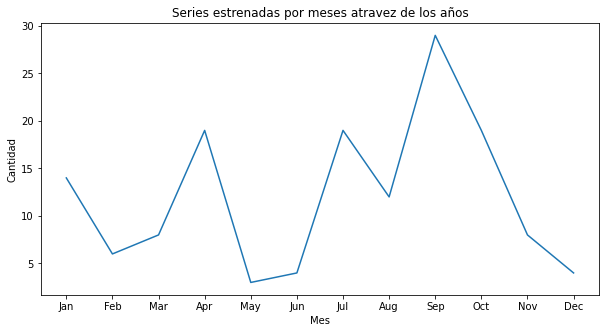

In [3]:

meses = df_scrapy['release_date'].str.split(".",2).str[0]
en_meses = meses.value_counts()
orderen = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
en_meses.index = pd.CategoricalIndex(en_meses.index, categories=orderen, ordered=True)
en_meses = en_meses.sort_index()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(en_meses.index, en_meses.values)
plt.title("Series estrenadas por meses atravez de los años")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.show()



## Cantidad por rating 

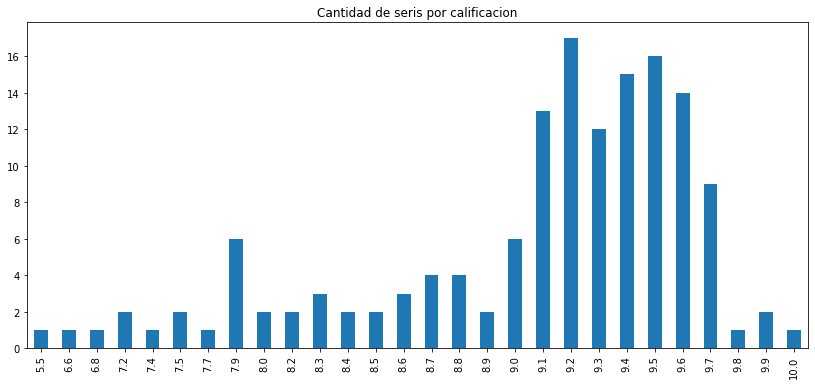

In [4]:
cali = df_scrapy['rating'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
plt.title('Cantidad de seris por calificacion')
plt.show()

## Cantidad de series por duracion de capitulos


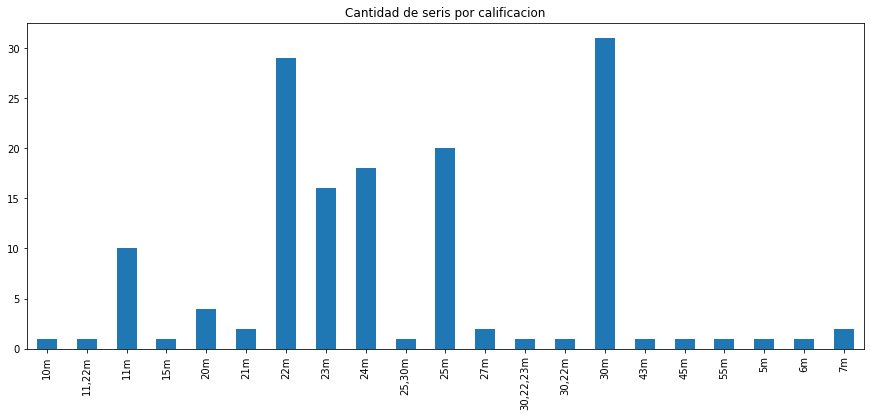

In [5]:
cali = df_scrapy['runtime'].value_counts().sort_index().plot(kind='bar', figsize=(15,6))
plt.title('Cantidad de seris por calificacion')
plt.show()

## Series por votos acumulados 


<AxesSubplot:xlabel='name_serie'>

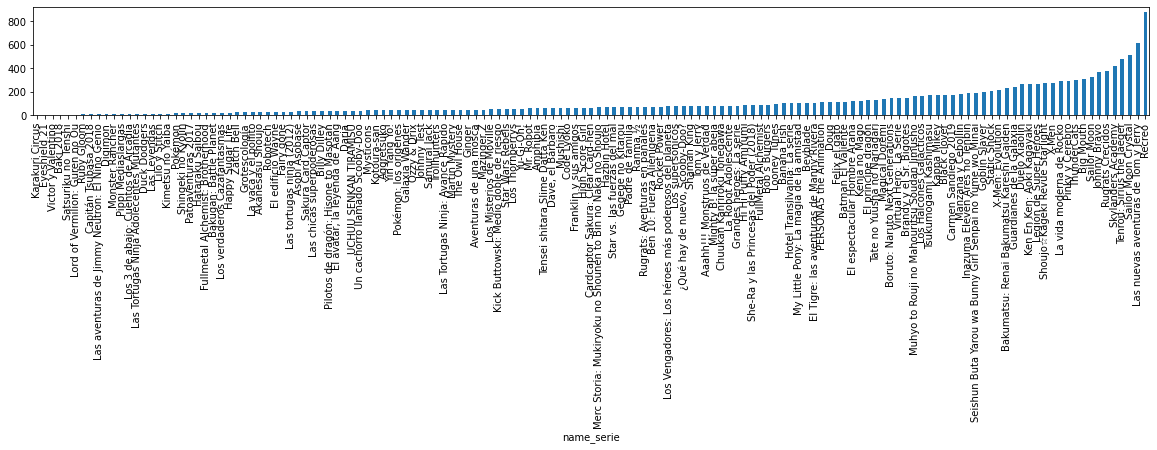

In [84]:
serie_votes = df_scrapy[['name_serie', 'votes']]
se_voto = serie_votes.groupby('name_serie')['votes'].sum()
se_voto = se_voto.sort_values(axis=0, ascending=True)
se_voto.plot(kind='bar',figsize=(20,2))

## Series por cantidad de votos

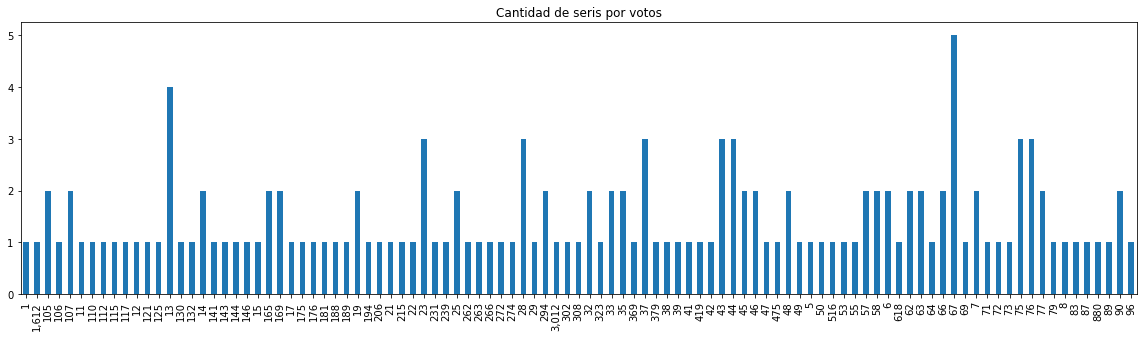

In [6]:
cali = df_scrapy['votes'].value_counts().sort_index().plot(kind='bar', figsize=(20,5))
plt.title('Cantidad de seris por votos')
plt.show()

## Series por canal

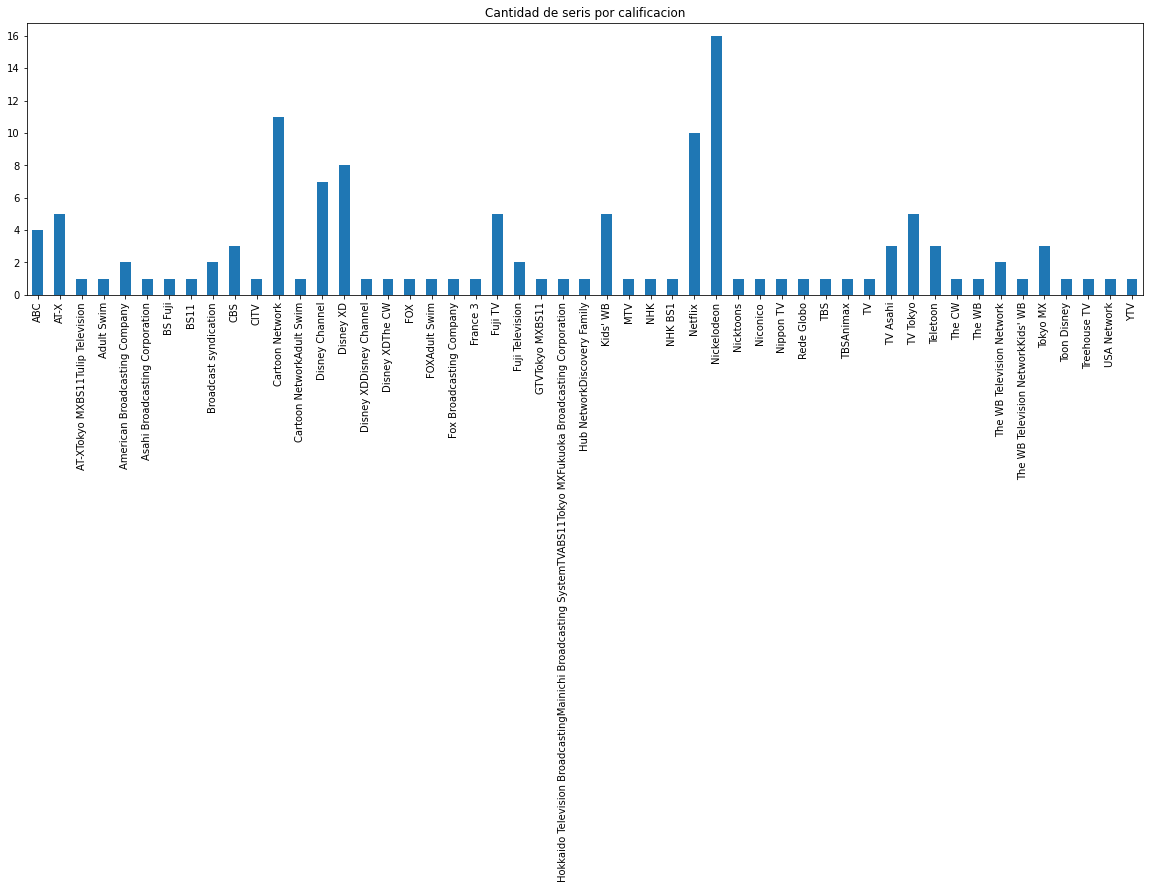

In [7]:
cali = df_scrapy['channel'].value_counts().sort_index().plot(kind='bar', figsize=(20,5))
plt.title('Cantidad de seris por calificacion')
plt.show()

## Series por año de emicion 

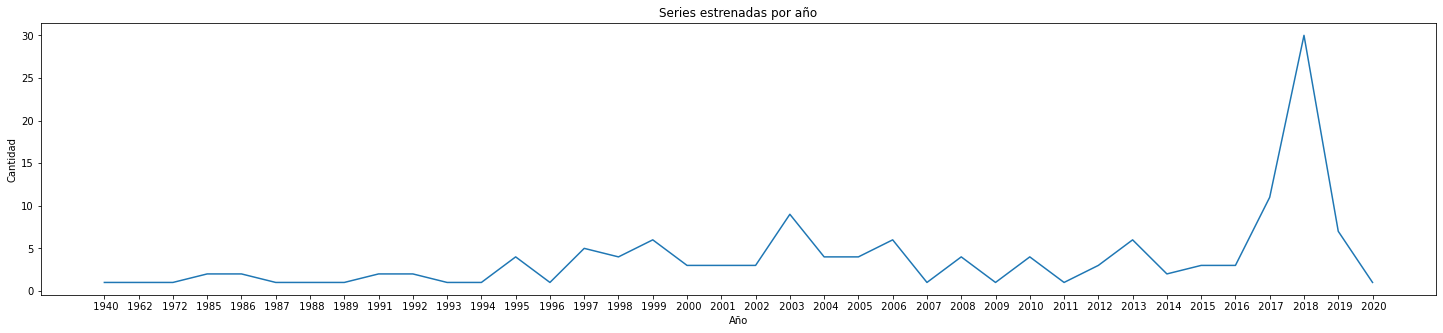

In [8]:

anio = df_scrapy['release_date'].str.split(",",2).str[1]
en_anio = anio.value_counts()
en_anio = en_anio.sort_index()
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(en_anio.index, en_anio.values) 
plt.title("Series estrenadas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()

## Top canal por votos 



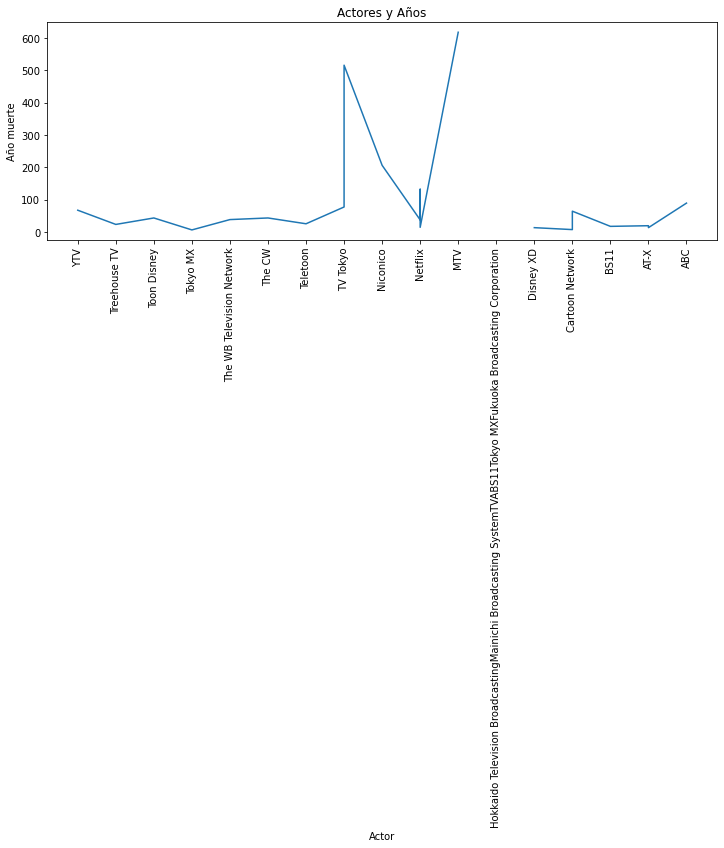

In [73]:
canal = df_scrapy[['channel','votes']][8:30].sort_values(by=['channel'], ascending= False)
voto = pd.Series(canal['votes'].values, index=canal['channel'])
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(voto.index, voto.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Año muerte')
plt.xlabel('Actor')
plt.title('Actores y Años')
plt.show()


## Rating por votos acumulados

<AxesSubplot:xlabel='rating'>

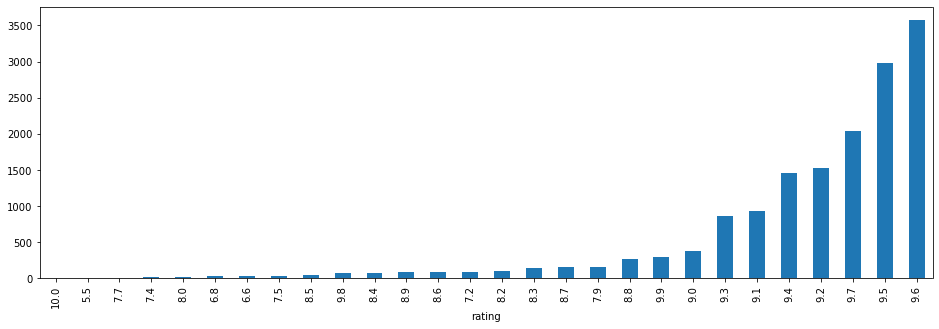

In [70]:
#df_scrapy['votes'] = df_scrapy['votes'].astype(int)
#df_scrapy['votes'] = pd.to_numeric(df_scrapy['votes'],errors='coerce')
rating_votes = df_scrapy[['rating', 'votes']]
ra_voto = rating_votes.groupby('rating')['votes'].sum()
ra_voto = ra_voto.sort_values(axis=0, ascending=True)
ra_voto.plot(kind='bar',figsize=(16,5))